In [2]:
# Load the dataset
import pandas as pd

# Load the dataset
df = pd.read_csv("titanic.csv")

# Display the first few rows of the dataset
print(df.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


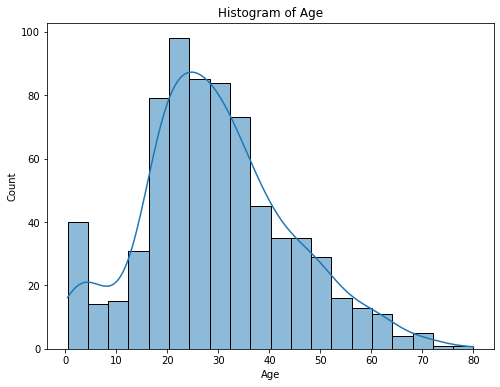

In [3]:
# Performing Vizualization

import matplotlib.pyplot as plt
import seaborn as sns

# Univariate Analysis - Histogram of Age
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x="age", kde=True)
plt.title("Histogram of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

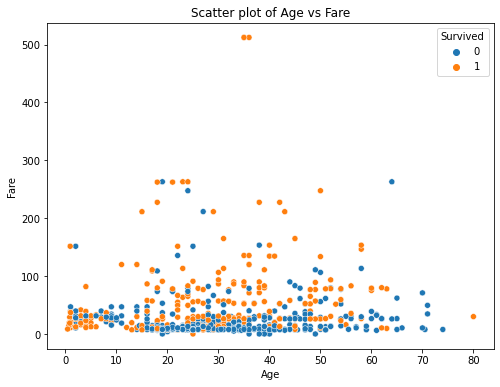

In [4]:
# Bivariate Analysis - Scatter plot of Age vs Fare
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="age", y="fare", hue="survived")
plt.title("Scatter plot of Age vs Fare")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.legend(title="Survived")
plt.show()

<Figure size 720x576 with 0 Axes>

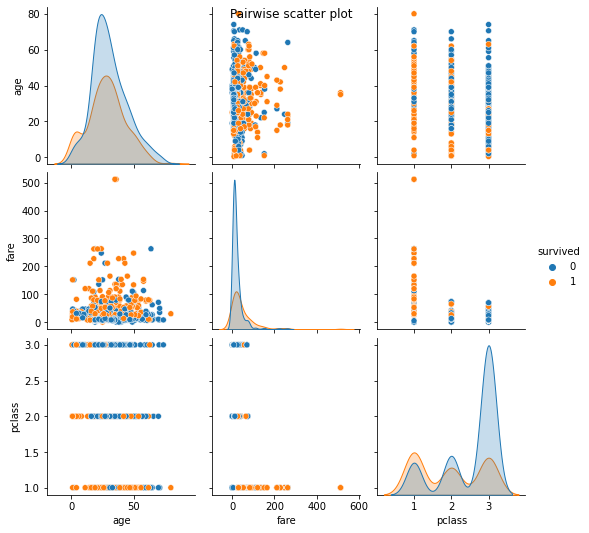

In [5]:
# Multivariate Analysis - Pairwise scatter plot
plt.figure(figsize=(10, 8))
sns.pairplot(data=df, vars=["age", "fare", "pclass"], hue="survived")
plt.suptitle("Pairwise scatter plot")
plt.show()

In [6]:
# Perform descriptive statistics
Statistics = df.describe()

# Display the descriptive statistics
print(Statistics)

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


In [7]:
# Fill missing values in 'Age' column with mean
mean_age = df['age'].mean()
df['age'] = df['age'].fillna(mean_age)

# Fill missing values in 'Embarked' column with mode
mode_embarked = df['embarked'].mode()[0]
df['embarked'] = df['embarked'].fillna(mode_embarked)

# Fill missing values in 'deck' column with mode
mode_embarked = df['deck'].mode()[0]
df['deck'] = df['deck'].fillna(mode_embarked)

print(df)

     survived  pclass     sex        age  sibsp  parch     fare embarked  \
0           0       3    male  22.000000      1      0   7.2500        S   
1           1       1  female  38.000000      1      0  71.2833        C   
2           1       3  female  26.000000      0      0   7.9250        S   
3           1       1  female  35.000000      1      0  53.1000        S   
4           0       3    male  35.000000      0      0   8.0500        S   
..        ...     ...     ...        ...    ...    ...      ...      ...   
886         0       2    male  27.000000      0      0  13.0000        S   
887         1       1  female  19.000000      0      0  30.0000        S   
888         0       3  female  29.699118      1      2  23.4500        S   
889         1       1    male  26.000000      0      0  30.0000        C   
890         0       3    male  32.000000      0      0   7.7500        Q   

      class    who  adult_male deck  embark_town alive  alone  
0     Third    man     

##### Find the outliers and replace the outliers


In [17]:
z_scores = np.abs(zscore(df['fare']))
threshold = 3
outlier_indices = np.where(z_scores > threshold)[0] 
df.loc[outlier_indices, 'fare'] = df['fare'].median()

# Print the modified DataFrame
print(df)

     survived  pclass     sex        age  sibsp  parch     fare embarked  \
0           0       3    male  22.000000      1      0   7.2500        S   
1           1       1  female  38.000000      1      0  71.2833        C   
2           1       3  female  26.000000      0      0   7.9250        S   
3           1       1  female  35.000000      1      0  53.1000        S   
4           0       3    male  35.000000      0      0   8.0500        S   
..        ...     ...     ...        ...    ...    ...      ...      ...   
886         0       2    male  27.000000      0      0  13.0000        S   
887         1       1  female  19.000000      0      0  30.0000        S   
888         0       3  female  29.699118      1      2  23.4500        S   
889         1       1    male  26.000000      0      0  30.0000        C   
890         0       3    male  32.000000      0      0   7.7500        Q   

      class    who  adult_male deck  embark_town alive  alone  
0     Third    man     

In [20]:
# Check for Categorical columns and perform encoding
from sklearn.preprocessing import LabelEncoder

categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    df[column] = LabelEncoder().fit_transform(df[column])

df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.000000,1,0,7.2500,2,2,1,True,2,2,0,False
1,1,1,0,38.000000,1,0,71.2833,0,0,2,False,2,0,1,False
2,1,3,0,26.000000,0,0,7.9250,2,2,2,False,2,2,1,True
3,1,1,0,35.000000,1,0,53.1000,2,0,2,False,2,2,1,False
4,0,3,1,35.000000,0,0,8.0500,2,2,1,True,2,2,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2,1,1,True,2,2,0,True
887,1,1,0,19.000000,0,0,30.0000,2,0,2,False,1,2,1,True
888,0,3,0,29.699118,1,2,23.4500,2,2,2,False,2,2,0,False
889,1,1,1,26.000000,0,0,30.0000,0,0,1,True,2,0,1,True


In [25]:
# 10. Split the data into dependent and independent variables
X = df.drop('survived', axis=1)
y = df['survived']
X

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,3,1,22.000000,1,0,7.2500,2,2,1,True,2,2,0,False
1,1,0,38.000000,1,0,71.2833,0,0,2,False,2,0,1,False
2,3,0,26.000000,0,0,7.9250,2,2,2,False,2,2,1,True
3,1,0,35.000000,1,0,53.1000,2,0,2,False,2,2,1,False
4,3,1,35.000000,0,0,8.0500,2,2,1,True,2,2,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,2,1,1,True,2,2,0,True
887,1,0,19.000000,0,0,30.0000,2,0,2,False,1,2,1,True
888,3,0,29.699118,1,2,23.4500,2,2,2,False,2,2,0,False
889,1,1,26.000000,0,0,30.0000,0,0,1,True,2,0,1,True


In [26]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64

In [29]:
# Scale the independent variables
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 8.27377244e-01,  7.37695132e-01, -5.93630788e-01, ...,
         5.81113943e-01, -7.89272336e-01, -1.23164490e+00],
       [-1.56610693e+00, -1.35557354e+00,  6.38108008e-01, ...,
        -1.93846038e+00,  1.26698980e+00, -1.23164490e+00],
       [ 8.27377244e-01, -1.35557354e+00, -2.85696089e-01, ...,
         5.81113943e-01,  1.26698980e+00,  8.11922334e-01],
       ...,
       [ 8.27377244e-01, -1.35557354e+00, -9.24419072e-04, ...,
         5.81113943e-01, -7.89272336e-01, -1.23164490e+00],
       [-1.56610693e+00,  7.37695132e-01, -2.85696089e-01, ...,
        -1.93846038e+00,  1.26698980e+00,  8.11922334e-01],
       [ 8.27377244e-01,  7.37695132e-01,  1.76205960e-01, ...,
        -6.78673218e-01, -7.89272336e-01,  8.11922334e-01]])

In [30]:
# Split the data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [31]:
X_train


array([[-1.56610693,  0.73769513,  1.21548557, ...,  0.58111394,
        -0.78927234,  0.81192233],
       [-0.36936484,  0.73769513, -0.51664711, ...,  0.58111394,
        -0.78927234,  0.81192233],
       [ 0.82737724,  0.73769513,  0.17620596, ...,  0.58111394,
        -0.78927234,  0.81192233],
       ...,
       [ 0.82737724,  0.73769513,  0.86905903, ...,  0.58111394,
        -0.78927234, -1.2316449 ],
       [-1.56610693, -1.35557354, -1.20950019, ...,  0.58111394,
         1.2669898 , -1.2316449 ],
       [-1.56610693,  0.73769513, -0.67061446, ...,  0.58111394,
        -0.78927234, -1.2316449 ]])

In [33]:
X_test

array([[ 8.27377244e-01,  7.37695132e-01, -9.24419072e-04, ...,
        -1.93846038e+00,  1.26698980e+00, -1.23164490e+00],
       [-3.69364841e-01,  7.37695132e-01,  9.92222849e-02, ...,
         5.81113943e-01, -7.89272336e-01,  8.11922334e-01],
       [ 8.27377244e-01,  7.37695132e-01, -7.47598137e-01, ...,
         5.81113943e-01, -7.89272336e-01,  8.11922334e-01],
       ...,
       [ 8.27377244e-01, -1.35557354e+00,  6.38108008e-01, ...,
         5.81113943e-01,  1.26698980e+00, -1.23164490e+00],
       [-3.69364841e-01, -1.35557354e+00, -9.78549161e-01, ...,
         5.81113943e-01,  1.26698980e+00,  8.11922334e-01],
       [ 8.27377244e-01, -1.35557354e+00, -1.97933693e+00, ...,
         5.81113943e-01,  1.26698980e+00, -1.23164490e+00]])

In [34]:
y_train

331    0
733    0
382    0
704    0
813    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: survived, Length: 712, dtype: int64

In [35]:
y_test

709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: survived, Length: 179, dtype: int64